In [1]:
import math

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': lambda x: '%6.2f' % x})

plt.style.use('seaborn')
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['font.family'] = 'serif'

In [2]:
def simulate_tree(S0, T, sigma, M):
    """returns the binomial tree describing an option price

    S0: :float
        Price of option
    T: :float
        Time to maturity of option, represented as fraction of a year (e.g. T=0.5 represents 6 months)
    sigma: :float
        Volatility of option over time period T / M
    M: :int
        Number of timesteps to simulate

    returns 
    : :numpy.array
        The (0, 0) element is S0. Each column is a timestep, with the rows corresponding to the 
        binomial outcomes (or zeros). Moving to the right means the price increased, moving down and right means
        the price decreased. Only the upper triagular part of the matrix is valid, with the rest being zeros.
        Therefore, the 0th row corresponds to the price always increasing. The diagonal corresponds to the 
        price always decreasing. 
    """
    dt = T / M
    
    # The up array has numbers 0,1,...,M on each row
    up = np.arange(M + 1)
    up = np.resize(up, (M + 1, M + 1))
    
    # The down array has 0s on the first row, 2s on the second, etc.
    down = up.T * 2
    
    # Note that up - down has zero in the top left, increments as you move right,
    # and decrements when you move right and down
    return np.triu(S0 * np.exp(sigma * math.sqrt(dt) * (up - down)))

In [3]:
S0 = 36
T = 1
sigma = 0.2
M = 360

tree = simulate_tree(S0, T, sigma, M)
tree

array([[ 36.00,  36.38,  36.77, ..., 1567.39, 1584.00, 1600.79],
       [  0.00,  35.62,  36.00, ..., 1534.70, 1550.96, 1567.39],
       [  0.00,   0.00,  35.25, ..., 1502.68, 1518.61, 1534.70],
       ...,
       [  0.00,   0.00,   0.00, ...,   0.83,   0.84,   0.84],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.82,   0.83],
       [  0.00,   0.00,   0.00, ...,   0.00,   0.00,   0.81]])

Text(0, 0.5, 'Option Price')

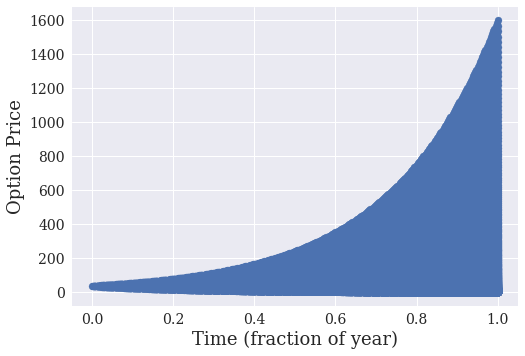

In [4]:
tree = np.where(tree != 0, tree, np.nan) # replace 0s with nans
plt.scatter(x=np.resize(np.linspace(0, T, M+1), (M+1, M+1)), y=tree)
plt.xlabel("Time (fraction of year)")
plt.ylabel("Option Price")